In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data_m = pd.read_csv("matches.csv", index_col=0)
data_d = pd.read_csv("deliveries.csv", index_col=0)

In [3]:
data_m.head(1)

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [4]:
data_d.head(1)

,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
match_id,,,,,,,,,,,,,,,,,,,,
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [5]:
print("Number of Seasons:", data_m['season'].nunique())
print("Seasons:",data_m['season'].unique())
print("Number of matches played:", data_m.index.nunique())

Number of Seasons: 12
Seasons: [2017 2008 2009 2010 2011 2012 2013 2014 2015 2016 2018 2019]
Number of matches played: 756


In [6]:
data_m.replace(['Rising Pune Supergiant'], ['Rising Pune Supergiants'],inplace=True)
data_m.replace(['Sunrisers Hyderabad', 'Mumbai Indians' ,'Gujarat Lions'
 ,'Royal Challengers Bangalore',
 'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
 'Chennai Super Kings' ,'Rajasthan Royals' ,'Deccan Chargers',
 'Kochi Tuskers Kerala' ,'Pune Warriors', 'Rising Pune Supergiants',
 'Delhi Capitals']
                ,['SRH','MI','GL','RCB','KKR','DD','KXIP','CSK','RR','DC','KTK','PW','RPS', 'DCa'],inplace=True)

data_d.replace(['Sunrisers Hyderabad', 'Mumbai Indians' ,'Gujarat Lions'
 ,'Royal Challengers Bangalore',
 'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
 'Chennai Super Kings' ,'Rajasthan Royals' ,'Deccan Chargers',
 'Kochi Tuskers Kerala' ,'Pune Warriors', 'Rising Pune Supergiants',
 'Delhi Capitals']
                ,['SRH','MI','GL','RCB','KKR','DD','KXIP','CSK','RR','DC','KTK','PW','RPS', 'DCa'],inplace=True)

print('Number of Teams:', data_m['team1'].nunique())
print('Teams featured in the Tournament:\n',data_m['team1'].unique() )

Number of Teams: 14
Teams featured in the Tournament:
 ['SRH' 'MI' 'GL' 'RPS' 'RCB' 'KKR' 'DD' 'KXIP' 'CSK' 'RR' 'DC' 'KTK' 'PW'
 'DCa']


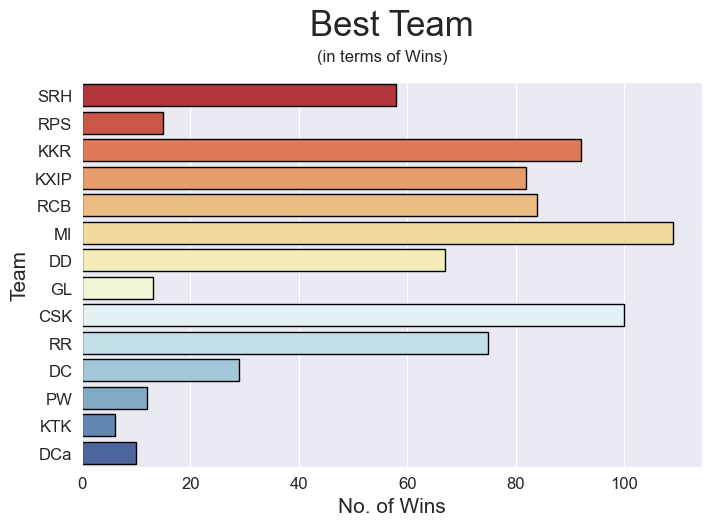

In [7]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,5))
sns.countplot(y=data_m['winner'], palette='RdYlBu', edgecolor='black')
plt.title('Best Team\n', size=25)
plt.suptitle('\n(in terms of Wins)')
plt.ylabel('Team', size=15)
plt.xlabel('No. of Wins', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

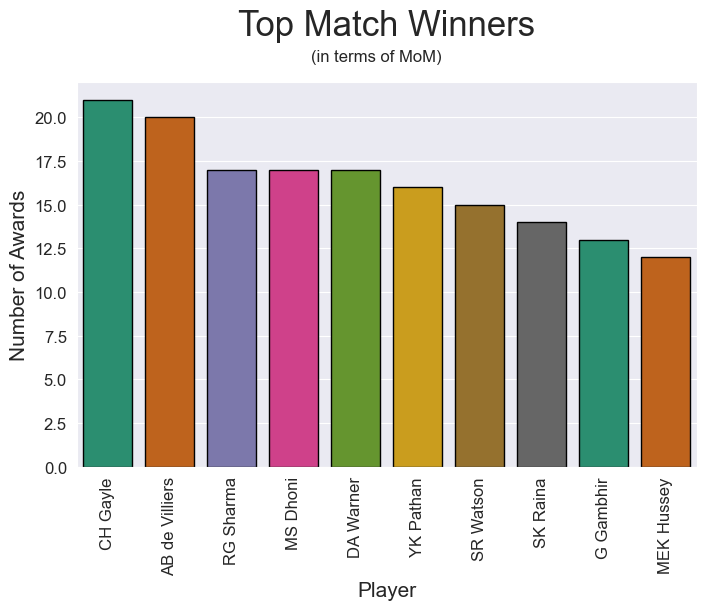

In [8]:
most_mom = data_m['player_of_match'].value_counts().head(10).reset_index()
most_mom.columns = ['Player', 'No. of Awards']

plt.figure(figsize=(8,5))
sns.barplot(x=most_mom['Player'], y=most_mom['No. of Awards'], palette='Dark2', edgecolor='black')
plt.xticks(rotation='vertical')
plt.title('Top Match Winners\n', size=25)
plt.suptitle('\n(in terms of MoM)')
plt.ylabel('Number of Awards', size=15)
plt.xlabel('Player', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

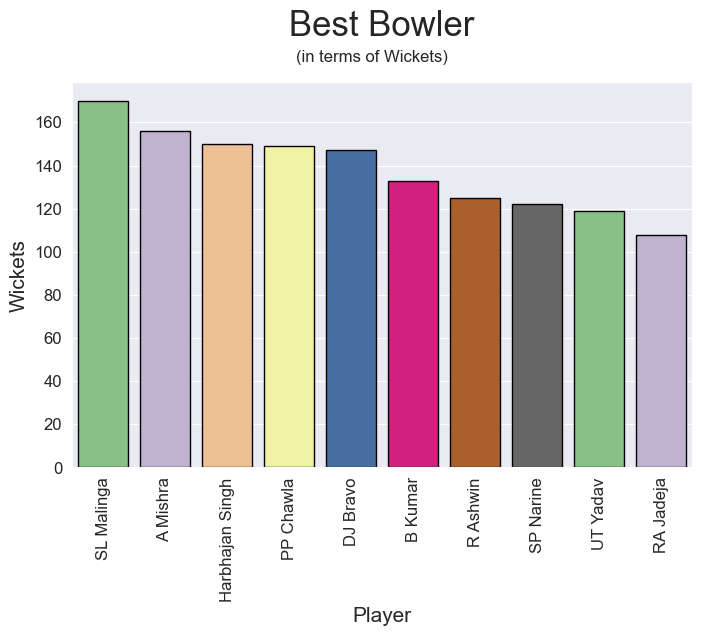

In [9]:
dismissal = ['caught','bowled','caught and bowled','hit wicket','lbw','stumped']
best_bowler = data_d.loc[data_d['dismissal_kind'].isin(dismissal)]
best_bowler = best_bowler['bowler'].value_counts().reset_index().head(10)
best_bowler.columns = ['bowler', 'wickets']

plt.figure(figsize=(8,5))
sns.barplot(x=best_bowler['bowler'], y=best_bowler['wickets'],palette='Accent', edgecolor='black')
plt.xticks(rotation='vertical')
plt.title('Best Bowler\n', size=25)
plt.suptitle('\n(in terms of Wickets)')
plt.ylabel('Wickets', size=15)
plt.xlabel('Player', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

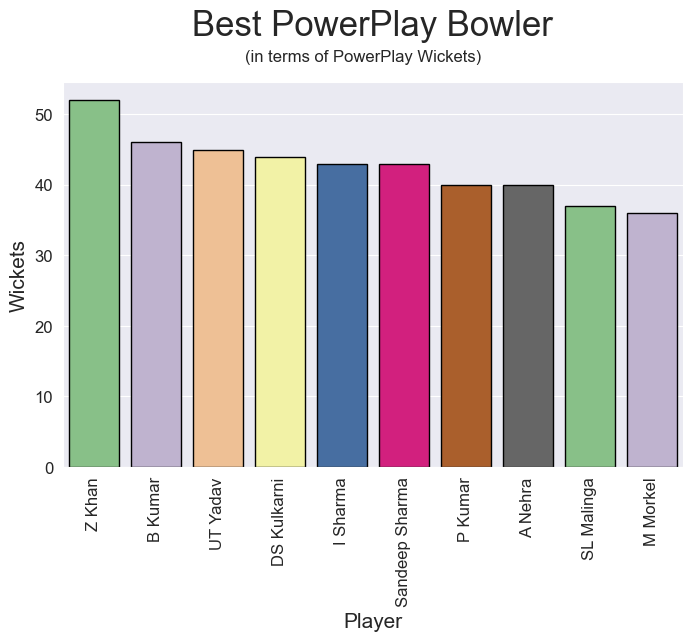

In [10]:
powerplay = [1,2,3,4,5,6]
best_bowler_pp = data_d.loc[data_d['dismissal_kind'].isin(dismissal) & data_d['over'].isin(powerplay)]
best_bowler_pp = best_bowler_pp['bowler'].value_counts().reset_index().head(10)
best_bowler_pp.columns = ['bowler', 'wickets']

plt.figure(figsize=(8,5))
sns.barplot(x=best_bowler_pp['bowler'], y=best_bowler_pp['wickets'],palette='Accent',edgecolor='black')
plt.xticks(rotation='vertical')
plt.title('Best PowerPlay Bowler\n', size=25)
plt.suptitle('\n(in terms of PowerPlay Wickets)')
plt.ylabel('Wickets', size=15)
plt.xlabel('Player', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

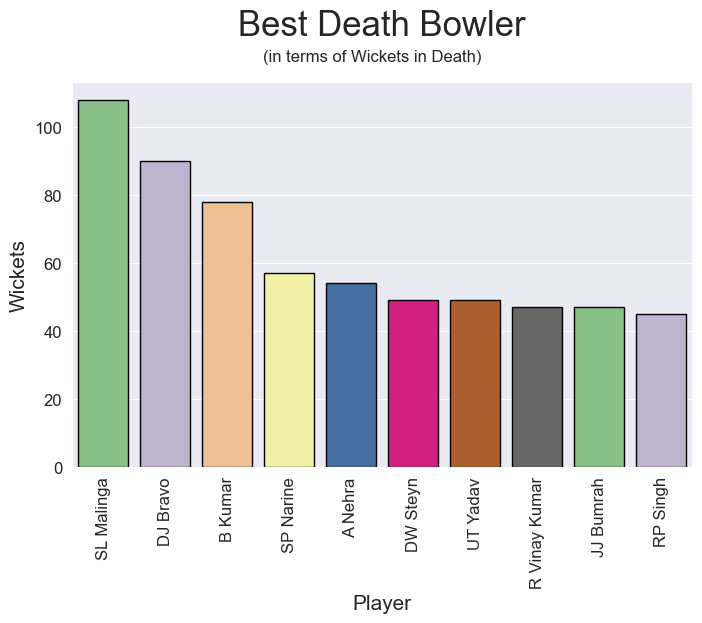

In [11]:
death = [16,17,18,19,20]
best_bowler_death = data_d.loc[data_d['dismissal_kind'].isin(dismissal) & data_d['over'].isin(death)]
best_bowler_death = best_bowler_death['bowler'].value_counts().reset_index().head(10)
best_bowler_death.columns = ['bowler', 'wickets']

plt.figure(figsize=(8,5))
sns.barplot(x=best_bowler_death['bowler'], y=best_bowler_death['wickets'],palette='Accent',edgecolor='black')
plt.xticks(rotation='vertical')
plt.title('Best Death Bowler\n', size=25)
plt.suptitle('\n(in terms of Wickets in Death)')
plt.ylabel('Wickets', size=15)
plt.xlabel('Player', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

C:\Users\rajan\AppData\Local\Temp\ipykernel_12408\3957634947.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  economy_rate=data_d.groupby(['bowler']).sum()


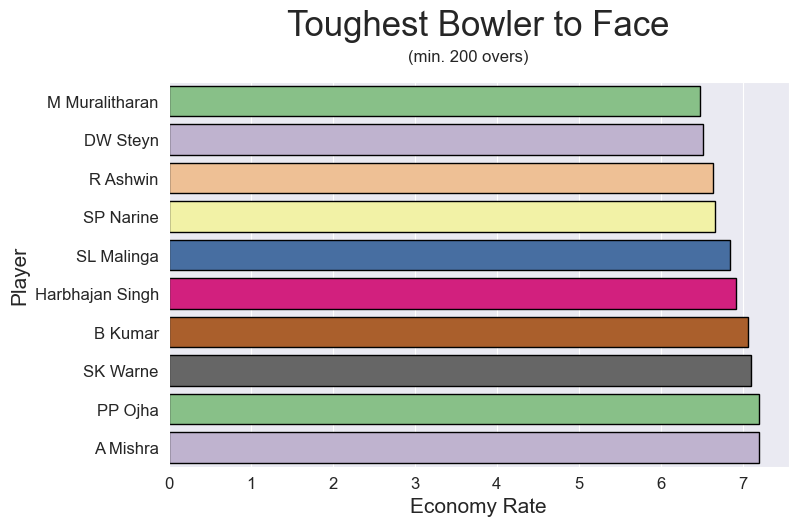

In [12]:
economy_rate=data_d.groupby(['bowler']).sum()
economy_rate['over'] = data_d['bowler'].value_counts()/6
economy_rate['runs'] = economy_rate['wide_runs'] + economy_rate['noball_runs'] + economy_rate['batsman_runs']
economy_rate = economy_rate[economy_rate['over'] >= 200]
economy_rate['rate'] = economy_rate['runs']/economy_rate['over']
economy_rate = economy_rate.sort_values(by=['rate'], ascending=True).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=economy_rate['rate'], y=economy_rate.index, palette='Accent',edgecolor='black')
plt.title('Toughest Bowler to Face\n', size=25)
plt.suptitle('\n(min. 200 overs)')
plt.ylabel('Player', size=15)
plt.xlabel('Economy Rate', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

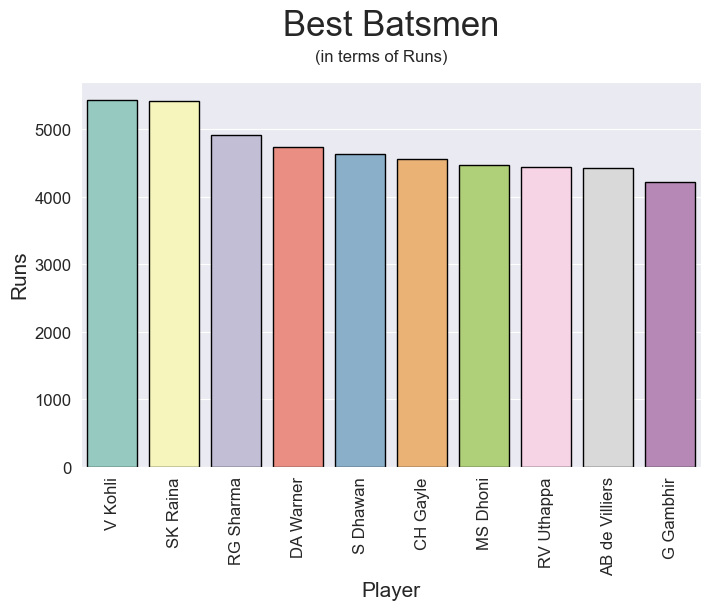

In [13]:
best_batsman = data_d.groupby(['batsman']).batsman_runs.sum().reset_index()
best_batsman = best_batsman.set_index('batsman').sort_values(by=['batsman_runs'], ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=best_batsman.index, y=best_batsman['batsman_runs'], palette='Set3',edgecolor='black')
plt.xticks(rotation='vertical')
plt.title('Best Batsmen\n', size=25)
plt.suptitle('\n(in terms of Runs)')
plt.ylabel('Runs', size=15)
plt.xlabel('Player', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

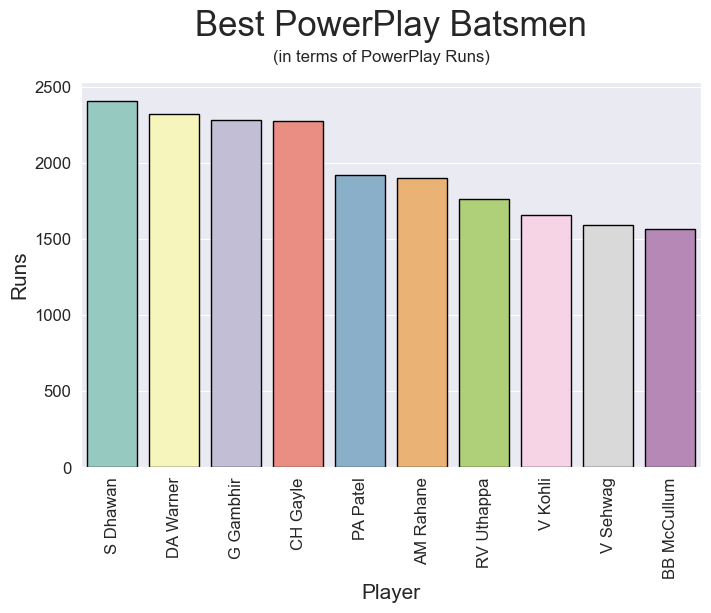

In [14]:
best_batsman_pp = data_d.loc[data_d['over'].isin(powerplay)]
best_batsman_pp = best_batsman_pp.groupby(['batsman']).batsman_runs.sum().reset_index()
best_batsman_pp = best_batsman_pp.set_index('batsman').sort_values(by=['batsman_runs'], ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=best_batsman_pp.index, y=best_batsman_pp['batsman_runs'], palette='Set3',edgecolor='black')
plt.xticks(rotation='vertical')
plt.title('Best PowerPlay Batsmen\n', size=25)
plt.suptitle('\n(in terms of PowerPlay Runs)')
plt.ylabel('Runs', size=15)
plt.xlabel('Player', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

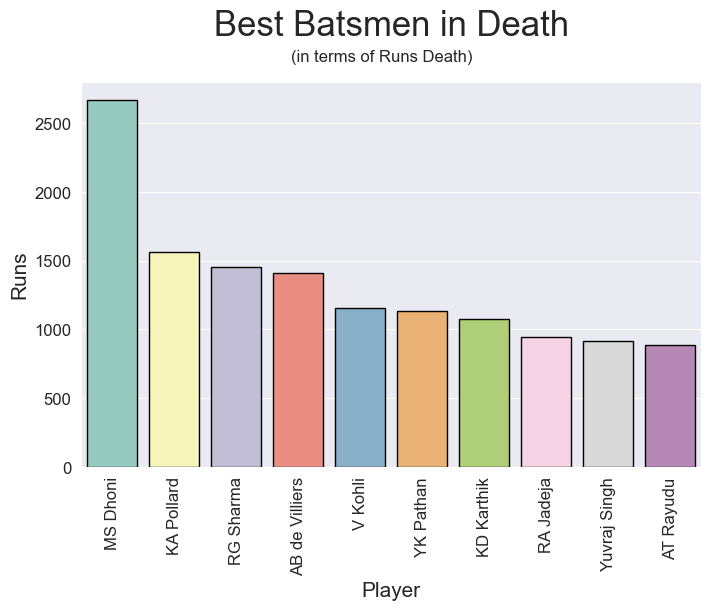

In [15]:
best_batsman_death = data_d.loc[data_d['over'].isin(death)]
best_batsman_death = best_batsman_death.groupby(['batsman']).batsman_runs.sum().reset_index()
best_batsman_death = best_batsman_death.set_index('batsman').sort_values(by=['batsman_runs'], ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=best_batsman_death.index, y=best_batsman_death['batsman_runs'], palette='Set3', edgecolor='black')
plt.xticks(rotation='vertical')
plt.title('Best Batsmen in Death\n', size=25)
plt.suptitle('\n(in terms of Runs Death)')
plt.ylabel('Runs', size=15)
plt.xlabel('Player', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

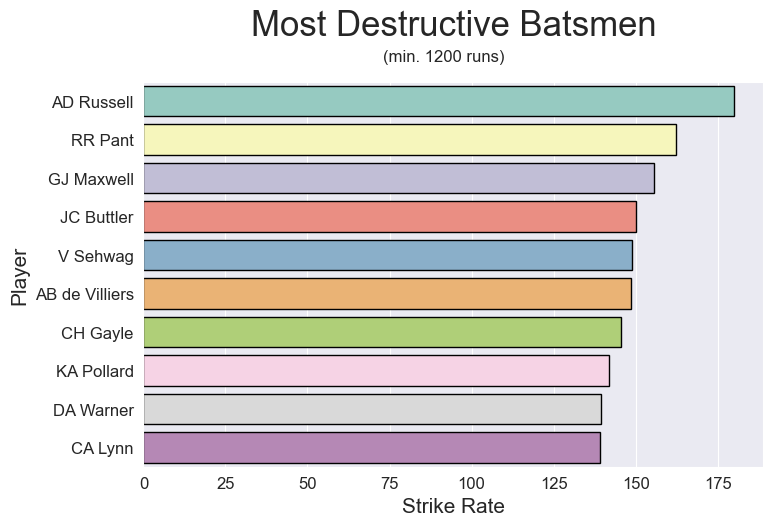

In [16]:
strike_rate = data_d.groupby(['batsman']).batsman_runs.sum().reset_index()
strike_rate['balls'] = data_d.groupby(['batsman']).ball.count().reset_index()['ball']
strike_rate['rate'] = strike_rate['batsman_runs']/strike_rate['balls']*100
strike_rate = strike_rate[strike_rate['batsman_runs'] >= 1200].sort_values(by=['rate'], ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=strike_rate['rate'], y=strike_rate['batsman'], palette='Set3', edgecolor='black')
plt.title('Most Destructive Batsmen\n', size=25)
plt.suptitle('\n(min. 1200 runs)')
plt.ylabel('Player', size=15)
plt.xlabel('Strike Rate', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

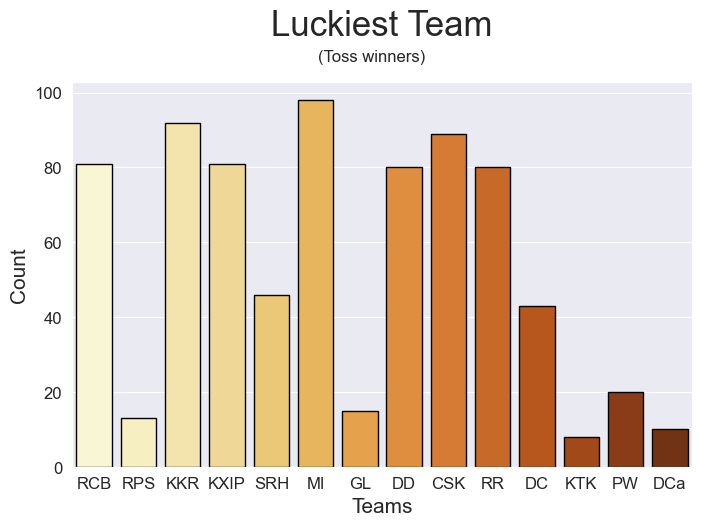

In [17]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,5))
sns.countplot(x=data_m['toss_winner'], palette='YlOrBr', edgecolor='black')
plt.title('Luckiest Team\n', size=25)
plt.ylabel('Count', size=15)
plt.xlabel('Teams', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.suptitle('\n(Toss winners)')
plt.show()

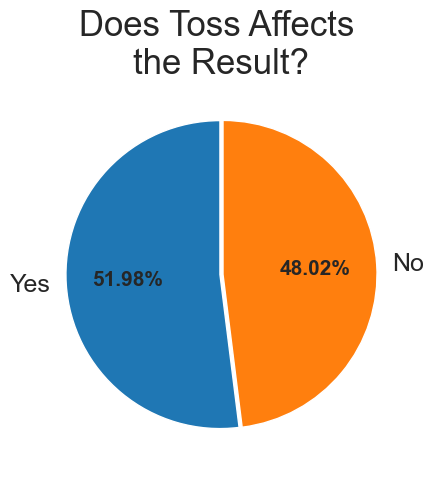

In [18]:
toss = data_m.loc[data_m['toss_winner'] == data_m['winner']]
data = [len(toss), len(data_m)-len(toss)]
fig, ax = plt.subplots(figsize=(5, 5))
wedges, texts, autotexts = ax.pie(data, labels=['Yes', 'No'], startangle=90,explode=(.01,.01) ,autopct='%1.2f%%')
plt.title('Does Toss Affects \nthe Result?',size=25)
plt.setp(texts, size=18)
plt.setp(autotexts, size=15, weight="bold")
plt.show()

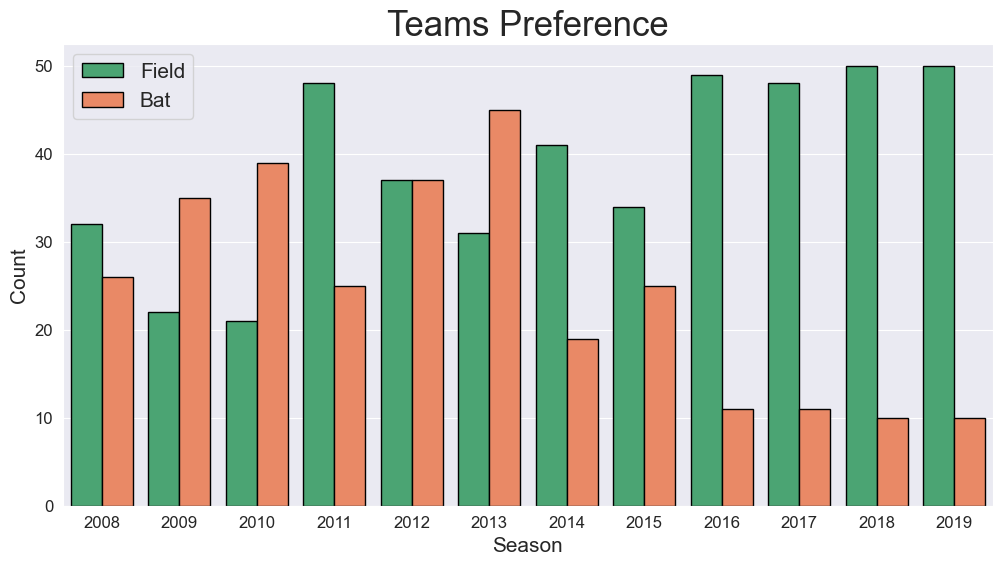

In [19]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
sns.countplot(x=data_m['season'],hue=data_m['toss_decision'] 
              ,palette=dict(field='mediumseagreen',bat='coral'), edgecolor='black')
plt.title('Teams Preference', size=25)
plt.ylabel('Count', size=15)
plt.xlabel('Season', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.legend(('Field', 'Bat'), prop={"size" :15})
plt.show()

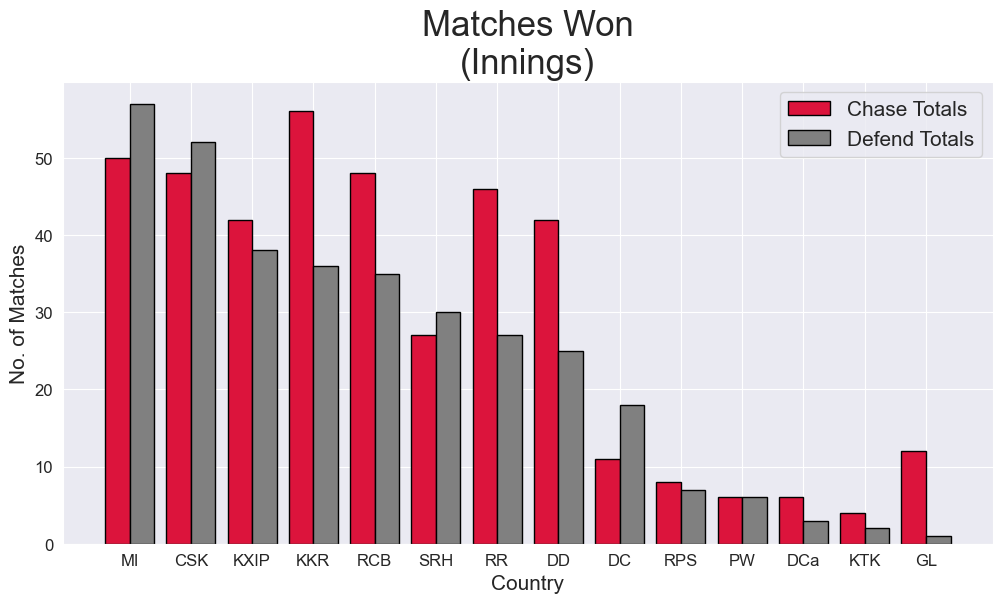

In [20]:
innings = data_m.loc[data_m['win_by_runs'] != 0]
innings = innings['winner'].value_counts().reset_index().set_index('index')
innings.columns = ['Defend Totals']
innings2 = data_m.loc[data_m['win_by_wickets'] != 0]
innings2 = innings2['winner'].value_counts().reset_index().set_index('index')
innings2.columns = ['Bat2']
innings['Chase Totals'] = innings2['Bat2']


x = np.arange(14)
fig,ax = plt.subplots(figsize=(12,6))
c1 = plt.bar(x- 0.2, innings['Chase Totals'], width=0.4, color='crimson', edgecolor='black')
c2 = plt.bar(x+0.2, innings['Defend Totals'], width=0.4, color='grey', edgecolor='black')
plt.xticks(size=12)
ax.set_xticks(x)
ax.set_xticklabels(innings.index)
plt.yticks(size=12)
plt.title('Matches Won\n(Innings)', size=25)
plt.xlabel('Country', size=15)
plt.ylabel('No. of Matches', size=15)
plt.legend((c1[0], c2[0]) ,('Chase Totals', 'Defend Totals'), prop={"size" :15}, loc=1)
plt.show()